In [ ]:
# -*- coding: utf-8 -*-
"""basic_eda_spark.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/github/besherh/BigDataManagement/blob/main/SparkNotebooks/basic_eda_spark.ipynb

#Setting up PySpark in Colab
Spark is written in the Scala programming language and requires the Java Virtual Machine (JVM) to run. Therefore, our first task is to download Java.
"""

!apt-get install openjdk-8-jdk-headless


Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk-headless is already the newest version (8u312-b07-0ubuntu1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [ ]:

"""Next, we will install Apache Spark 3.0.1 with Hadoop 2.7 .

"""

!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz



--2022-05-19 13:29:16--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz.1’

spark-3.2.1-bin-had 100%[===================>] 260.01M  5.78MB/s    in 59s     

2022-05-19 13:30:16 (4.44 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz.1’ saved [272637746/272637746]



In [ ]:
"""Now, we just need to unzip that folder.

"""

!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz


In [ ]:
"""There is one last thing that we need to install and that is the findspark library. It will locate Spark on the system and import it as a regular library.


"""

!pip install -q findspark

In [ ]:
"""Now that we have installed all the necessary dependencies in Colab, it is time to set the environment path. This will enable us to run Pyspark in the Colab environment.

"""

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

"""We need to locate Spark in the system. For that, we import findspark and use the findspark.init() method."""


'We need to locate Spark in the system. For that, we import findspark and use the findspark.init() method.'

In [ ]:
import findspark
findspark.init()
findspark.find()

"""Now, we can import SparkSession from pyspark.sql and create a SparkSession, which is the entry point to Spark.

You can give a name to the session using appName() and add some configurations with config() if you wish.
"""


'Now, we can import SparkSession from pyspark.sql and create a SparkSession, which is the entry point to Spark.\n\nYou can give a name to the session using appName() and add some configurations with config() if you wish.\n'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("MyFirstEDA")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

"""Finally, print the SparkSession variable."""

spark

"""#Loading data into PySpark
We will use the read.csv module. The inferSchema parameter provided will enable Spark to automatically determine the data type for each column but it has to go over the data once. If you don’t want that to happen, then you can instead provide the schema explicitly in the schema parameter.

"""

'#Loading data into PySpark\nWe will use the read.csv module. The inferSchema parameter provided will enable Spark to automatically determine the data type for each column but it has to go over the data once. If you don’t want that to happen, then you can instead provide the schema explicitly in the schema parameter.\n\n'

In [ ]:
#Download this file https://raw.githubusercontent.com/besherh/BigDataManagement/main/SparkCSV/deaily_weather.csv (r-click then saveas)
#then upload it to your colab session
df_ad = spark.read.csv("/content/ad-clicks.csv", header=True, inferSchema=True)

dfbuy = spark.read.csv("/content/buy-clicks.csv", header=True, inferSchema=True)

df_game = spark.read.csv("/content/game-clicks.csv", header=True, inferSchema=True)

df_level= spark.read.csv("/content/level-events.csv", header=True, inferSchema=True)

df_team_assignment = spark.read.csv("/content/team-assignments.csv", header=True, inferSchema=True)

df_team = spark.read.csv("/content/team.csv", header=True, inferSchema=True)

df_user_session = spark.read.csv("/content/user-session.csv", header=True, inferSchema=True)

df_user = spark.read.csv("/content/users.csv", header=True, inferSchema=True)



In [ ]:

df_ad.printSchema()
#you can use df.columns to check the columns without datatypes!

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- teamId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- adId: integer (nullable = true)
 |-- adCategory: string (nullable = true)



In [ ]:

"""#Print summary statistics.
 We can print the summary statistics for all the columns using the describe() method:
"""

df_ad.describe()


DataFrame[summary: string, timestamp: string, txId: string, userSessionId: string, teamId: string, userId: string, adId: string, adCategory: string]

In [ ]:
"""as you can see the output is not very clear, let's try to transpose the output (rows to columns)"""

df_ad.describe().toPandas().transpose()


,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,16323,None,None,2016-05-26 15:13:22,2016-06-16 11:05:29
txId,16323,24613.82925932733,9513.244787359043,5972,39833
userSessionId,16323,22090.77344850824,8780.27306545314,5649,39623
teamId,16323,70.29492127672609,39.63199500554996,2,179
userId,16323,1187.4641916314404,691.5619445575,1,2387
adId,16323,14.654046437542119,8.623599159144106,0,29
adCategory,16323,None,None,automotive,sports


In [ ]:
df_ad.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,16323,None,None,2016-05-26 15:13:22,2016-06-16 11:05:29
txId,16323,24613.82925932733,9513.244787359043,5972,39833
userSessionId,16323,22090.77344850824,8780.27306545314,5649,39623
teamId,16323,70.29492127672609,39.63199500554996,2,179
userId,16323,1187.4641916314404,691.5619445575,1,2387
adId,16323,14.654046437542119,8.623599159144106,0,29
adCategory,16323,None,None,automotive,sports


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


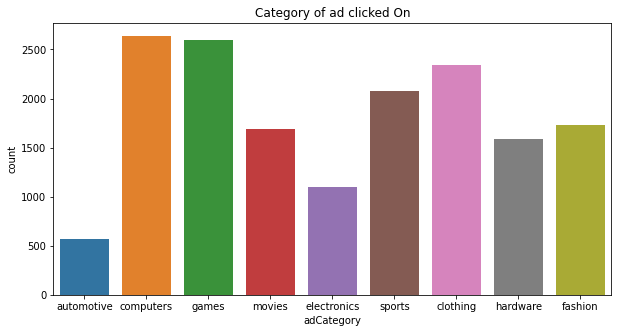

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Category of ad clicked On')
sns.barplot(df_ad['adCategory'],df_ad['count'])




In [ ]:
df_user_session.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,9250,None,None,2016-05-26 14:36:55,2016-06-16 11:06:54
userSessionId,9250,17973.522594594593,7953.932718534248,5648,38722
userId,9250,1189.6912432432432,691.0445045861406,0,2389
teamId,9250,72.3907027027027,41.458779047213525,2,179
assignmentId,9250,10288.336,6960.614801008102,5002,37948
sessionType,9250,None,None,end,start
teamLevel,9250,4.357405405405405,1.9248621663280168,1,8
platformType,9250,None,None,android,windows


In [ ]:
df_user_session = df_user_session.groupby("platformType").count().toPandas()


In [ ]:

display(df_user_session)

,platformType,count
0,iphone,3874
1,android,3274
2,linux,504
3,mac,358
4,windows,1240


([<matplotlib.patches.Wedge at 0x7fb6c3fdf790>,
 [Text(0.2775373787947574, 1.0644120458599364, 'iphone'),
  Text(-0.906732731402326, -0.6227646054519136, 'android'),
  Text(0.3399186864662839, -1.0461621703115804, 'linux'),
  Text(0.627375822999654, -0.9035483256115896, 'mac'),
  Text(1.0038843924975547, -0.4496844743815556, 'windows')],
 [Text(0.1513840247971404, 0.5805883886508744, '42%'),
  Text(-0.4945814898558141, -0.33968978479195283, '35%'),
  Text(0.18541019261797304, -0.5706339110790438, '5%'),
  Text(0.3422049943634476, -0.4928445412426852, '4%'),
  Text(0.5475733049986661, -0.24528244057175758, '13%')])

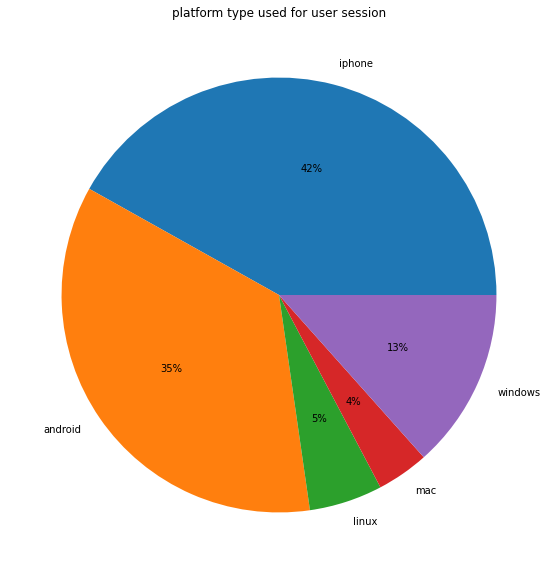

In [ ]:
plt.figure(figsize=(15,10))
plt.title('platform type used for user session')
plt.pie(df_user_session['count'],labels=df_user_session['platformType'],autopct='%.0f%%')


In [ ]:
df_teams=df_team.toPandas()

In [ ]:
df_team.stat.corr("teamId","strength")

-0.05054122701256567

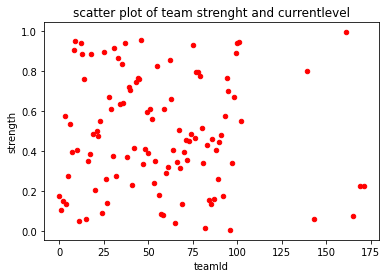

In [ ]:
df_teams.plot.scatter(x='teamId',y='strength',c='red',title='scatter plot of team strenght and currentlevel')

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
# %matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random
import os

In [ ]:
from pyspark.sql.functions import floor, col
from pyspark.sql.functions import current_date
from pyspark.sql.functions import to_date
from pyspark.sql.functions import when
from pyspark.sql import functions as F

In [ ]:
df_buy

,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0
3,2016-05-26 16:36:54,6067,5665,18,121,2,3.0
4,2016-05-26 17:06:54,6093,5709,11,2222,5,20.0
...,...,...,...,...,...,...,...
2942,2016-06-16 10:36:54,39838,34373,35,305,0,1.0
2943,2016-06-16 10:36:54,39839,37360,168,2016,1,2.0
2944,2016-06-16 10:36:54,39840,34542,64,68,2,3.0
2945,2016-06-16 10:36:54,39841,38277,27,667,4,10.0


In [ ]:
dfbuy

DataFrame[timestamp: string, txId: int, userSessionId: int, team: int, userId: int, buyId: int, price: double]

In [ ]:
d_f=dfbuy.toPandas()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


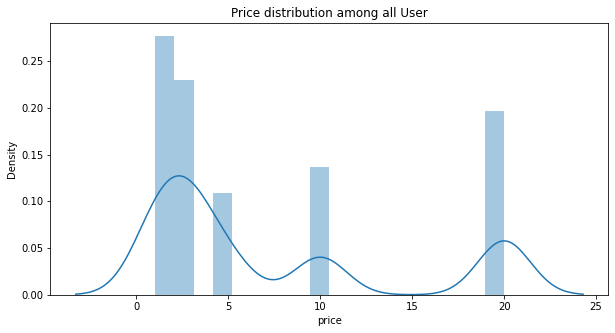

In [ ]:
#df_buy=df_buy.toPandas()

plt.figure(figsize=(10,5))
plt.title('Price distribution among all User')
sns.distplot(d_f['price']);
#sns.boxplot(d_f['price']);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb6c2b94e50>]],
      dtype=object)

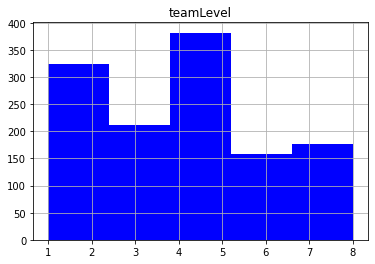

In [ ]:
dflevel = df_level.toPandas()

dflevel.hist(column='teamLevel', bins=5, color='blue')

